# Preparation


Import
---



In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 1.5MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582706 sha256=3084dd181f86f598780ce22ba11d5e3fc1575b6c9a610f4c1a7e8ba07b95688b
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import mglearn

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)



Data Load and check
---



In [0]:
result = pd.read_csv('/content/result.csv', index_col=0)

In [3]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 895 entries, 1015380000000000.0 to 1291950000000000.0
Data columns (total 11 columns):
tfidf_mean    895 non-null float64
tfidf_var     895 non-null float64
wt_mean       895 non-null float64
wt_var        895 non-null float64
edge_num      895 non-null int64
com_mean      895 non-null float64
com_var       895 non-null float64
core_count    895 non-null int64
betweeness    895 non-null float64
label         895 non-null int64
index         895 non-null float64
dtypes: float64(8), int64(3)
memory usage: 83.9 KB


In [4]:
result.head()

,tfidf_mean,tfidf_var,wt_mean,wt_var,edge_num,com_mean,com_var,core_count,betweeness,label,index
1.015380e+15,0.580047,3.446308,49.839074,66773.189930,851,12.236193,11.073473,19,0.000061,0,1.015380e+15
1.015380e+15,0.580047,3.446308,48.776235,30268.622950,1880,19.243085,55.099952,32,0.000008,0,1.015380e+15
1.036150e+15,0.580047,3.446308,66.430436,53579.221810,262,10.706107,11.467062,6,0.000378,0,1.036150e+15
1.037220e+15,0.580047,3.446308,34.421041,24854.554330,449,17.365256,48.459016,6,0.000164,0,1.037220e+15
1.245720e+15,0.580047,3.446308,21.683436,5115.391601,522,20.109195,52.790758,6,0.000186,0,1.245720e+15



*Data Preprocessing - drop & label reverse
---


In [0]:
result = result.drop(columns = ['tfidf_mean', 'tfidf_var', 'index'], axis = 1)

In [6]:
result.shape

(895, 8)

1. 처음에는 Truly True를 하는 방향으로 생각했기에 True = 1 로 잡았지만 positive 를 Fake 로 주는게 더 좋을 것 같아 일단 바꿈. 물론 True 를 1로 하면 반대로 생각하면 되지만.. 헷갈려져서

In [0]:
result.loc[result['label'] == 0, 'label'] = 0.9 # 둘 중 하나 먼저 바꾸면 합쳐져버리므로
result.loc[result['label'] == 1, 'label'] = 0
result.loc[result['label'] == 0.9, 'label'] = 1


In [8]:
fake = result[result['label'] == 1] 
fake.shape

(58, 8)

In [9]:
true = result[result['label'] == 0]
true.describe()

,wt_mean,wt_var,edge_num,com_mean,com_var,core_count,betweeness,label
count,837.000000,8.370000e+02,837.000000,837.000000,837.000000,837.000000,837.000000,837.0
mean,52.632116,7.192862e+04,1997.978495,15.854876,95.945559,35.145759,0.000071,0.0
std,31.218960,1.385127e+05,6558.025062,19.025565,609.207070,38.786377,0.000165,0.0
min,3.079937,1.124754e+02,60.000000,3.660000,1.993802,0.000000,0.000000,0.0
25%,32.290374,1.325477e+04,614.000000,11.130978,19.067185,13.000000,0.000011,0.0
50%,44.947297,3.088787e+04,1010.000000,13.693526,32.215669,23.000000,0.000032,0.0
75%,66.459862,7.468802e+04,1917.000000,16.528087,52.265191,48.000000,0.000071,0.0
max,218.094158,1.844746e+06,95494.000000,309.209629,9146.026678,395.000000,0.003022,0.0


In [0]:
target_label = result['label'].values


Train/Test Split
---





In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train = result.drop('label', axis=1).values
target_label = result['label'].values
# X_test = test.values

In [0]:
X_tr, X_test, y_tr, y_test = train_test_split(X_train, target_label, test_size=0.3, random_state=2019)

In [14]:
X_tr.shape

(626, 7)

In [15]:
X_test.shape

(269, 7)

In [0]:
df_test = pd.DataFrame(y_test)

In [17]:
df_test.sum()

0    20.0
dtype: float64


*Data Preprocessing - Scaling
---



2. Standard Scaler 사용해서 scaling 하기 

In [0]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_tr)
X_tr_scaled = scaler.transform(X_tr)
X_test_scaled = scaler.transform(X_test)

# Baseline model


Baseline Model Building
---



In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_tr_scaled, y_tr)

In [0]:
prediction = model.predict(X_test_scaled)

In [26]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
f1_score(y_test, prediction, average = 'macro')

0.5444281359376764

In [27]:
accuracy_score(y_test, prediction)

0.9442379182156134

In [28]:
confusion_matrix(y_test, prediction)

array([[253,   2],
       [ 13,   1]])

In [0]:
recall = (251) / (251+13)
print(f'Recall is :{recall}')

Recall is :0.9560439560439561



SVM Model default
---



In [0]:
from sklearn.svm import SVC

In [30]:
model_svm = SVC()
model_svm.fit(X_tr_scaled, y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_svm = model_svm.predict(X_test_scaled)

In [32]:
f1_score(y_test, prediction_svm, average='macro')

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4866412213740458

In [34]:
accuracy_score(y_test, prediction_svm)

0.9479553903345725

In [35]:
confusion_matrix(y_test, prediction_svm)

array([[255,   0],
       [ 14,   0]])

# Paramater Tuning & Validation


*GridSearchCV
---

일단 가능한 방법으로 Validation 과 Tuning 을 같이할 GridSearchCV 사용. 

In [0]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


# param_grid = [{'kernel': ['rbf'],
#                'C': [0.001, 0.01, 0.1, 1, 10, 100],
#                'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
#               {'kernel': ['linear'],
#                'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [0]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score, make_scorer
from sklearn.svm import SVC

scorers = {
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
}

# model = SVC(probability=True)
skf = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(SVC(), param_grid, cv=skf, return_train_score=True, scoring=scorers, refit='recall_score' )
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [0]:
grid_search.fit(X_tr_scaled, y_tr)

In [89]:
print("테스트 셋 점수: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

테스트 셋 점수: 0.15


In [90]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 10}
최고 교차 검증 점수: 0.14


In [91]:
print("최고 성능 모델: \n", grid_search.best_estimator_)

model = grid_search.best_estimator_
model.fit(X_tr_scaled, y_tr)

최고 성능 모델: 
 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:

pred = model.predict(X_test_scaled)
# pred = grid_search.predict(X_test)

In [93]:
print(f1_score(y_test, pred, average='binary'))
print(accuracy_score(y_test, pred))
print(recall_score(y_test, pred))
print(precision_score(y_test, pred))
print(confusion_matrix(y_test, pred))

0.18181818181818185
0.8996282527881041
0.15
0.23076923076923078
[[239  10]
 [ 17   3]]



Heatmap 으로 Score Display
---
https://github.com/rickiepark/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb

각 파라메터에 따라 score 값이 어떻게 바뀌는지 보여줌

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

result = pd.DataFrame(grid_search.cv_results_)

# display(np.transpose(result.head()))

In [0]:
scores = np.array(result.mean_test_score).reshape(6, 6)

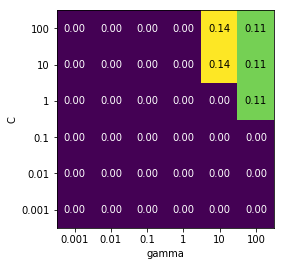

In [71]:
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels=param_grid['gamma'],
                     ylabel='C', yticklabels=param_grid['C'], cmap='viridis')


GridSearch Scoring 다르게 해보기
---
https://scikit-learn.org/0.15/auto_examples/grid_search_digits.html

참고 - scoring 추가

scoring 에 따라 성능이 달라짐을 알 수 있음. precision 을 선택시 무조건 애들을 모두 TN FN에 넣으므로 분모가 0이됨! 주의

In [73]:
# Set the parameters by cross-validation
from sklearn.metrics import classification_report
tuned_parameters = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = [None, 'recall'] # 'precision', 

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring=score, return_train_score=True) 
    clf.fit(X_tr, y_tr)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    print()
    print("best scores in this score metric")
    print()
    print(clf.best_score_)
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for None

Best parameters set found on development set:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

best scores in this score metric

0.9456869009584664

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       249
         1.0       1.00      0.10      0.18        20

    accuracy                           0.93       269
   macro avg       0.97      0.55      0.57       269
weighted avg       0.94      0.93      0.91       269


# Tuning hyper-parameters for recall

Best parameters set found on development set:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='o

# 결과 해석 및 튜닝


*Decision function 에서 threshold 바꾸기
---
현재 예측에 대한 성능 지표로서 decision_function 이나 predict_proba 를 사용 가능. decisin_functin 의 임계값 기본 0, predict_proba 의 임계값 기본 0.5.

> svm 의 경우 predict_proba 가 약간 문제가 있는데, predict 은 기본으로 제공하지만 predict_proba 의 경우 파라메터인 probability=True 로 해주어야 자기 훈련이 끝나고 추가로 svm 의 거리점수에 관해 로지스틱 회기를 훈련 시킴.



--> 그러므로 predict 과 predict_proba가 내주는 결과가 달라짐. 

그래서 decision function 을 사용하기로 생각. 출력이 임의의 값이라 조절에 손작업이 많이 들어가지만 조절해서 일단 넣어둠.



In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       249
         1.0       0.23      0.15      0.18        20

    accuracy                           0.90       269
   macro avg       0.58      0.55      0.56       269
weighted avg       0.88      0.90      0.89       269



Decision function 에 의해 나오는 값 확인

In [0]:
pred_dec = model.decision_function(X_test_scaled) 

Text(0, 0.5, '값')

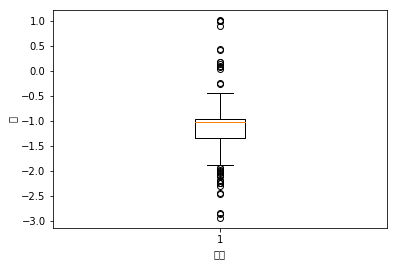

In [76]:
df_pred = pd.DataFrame(pred_dec, columns=['dist'])
# dfY.loc[dfY['dist'] <= 0, 'dist'].count()
plt.boxplot(pred_dec, manage_xticks=True)
plt.xlabel("확률")
plt.ylabel("값")

In [77]:
df_pred.describe()

,dist
count,269.000000
mean,-1.116944
std,0.569024
min,-2.943703
25%,-1.349737
50%,-1.013585
75%,-0.959279
max,1.015464


In [81]:
pred_lower_threshold = model.decision_function(X_test_scaled) > - 1.2
print(classification_report(y_test, pred_lower_threshold))

              precision    recall  f1-score   support

         0.0       0.86      0.31      0.46       249
         1.0       0.04      0.35      0.07        20

    accuracy                           0.32       269
   macro avg       0.45      0.33      0.26       269
weighted avg       0.80      0.32      0.43       269



In [82]:
print(f1_score(y_test, pred_lower_threshold, average='binary'))
print(accuracy_score(y_test, pred_lower_threshold))
print(recall_score(y_test, pred_lower_threshold))
print(confusion_matrix(y_test, pred_lower_threshold))

0.0707070707070707
0.3159851301115242
0.35
[[ 78 171]
 [ 13   7]]




*ROC 곡선
---




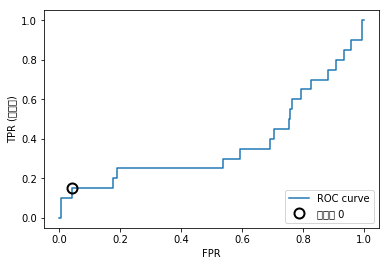

In [83]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test_scaled))

plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

결과를 보면 매우 안좋음. TPR 이 Recall 을 말하는데 지금도 최하점에 올리기도 마땅치 않음

# 위에 한 것들 Wrapper 로 구현

In [0]:
def preprocess_wrapper(df):
    df = df.drop(columns = ['tfidf_mean', 'tfidf_var', 'index'], axis = 1)
    df.loc[df['label'] == 0, 'label'] = 0.9 # 둘 중 하나 먼저 바꾸면 합쳐져버리므로
    df.loc[df['label'] == 1, 'label'] = 0
    df.loc[df['label'] == 0.9, 'label'] = 1
    return df
    
def split_scale_wrapper(df):
    X_train = df.drop('label', axis=1).values
    target_label = df['label'].values
    X_tr, X_test, y_tr, y_test = train_test_split(X_train, target_label, test_size=0.3, random_state=2019)
    scaler = StandardScaler()
    scaler.fit(X_tr)
    X_tr_scaled = scaler.transform(X_tr)
    X_test_scaled = scaler.transform(X_test)
    return X_tr_scaled, y_tr, X_test_scaled, y_test


*데이터셋을 비율별로 나눠주는 Wrapper 함수 구현
---
인풋 : 데이터 프레임, 자신이 원하는 True 기사의 100퍼센트 기준 비율

예 ) 만약 내가 fake, true 를 1:3으로 맞추고 싶다면, 백분위로 환산할시 True 기사의 전체 비율을 75% 이므로 두번째 frac 은 75 를 주어야함

In [0]:
def new_df_warpper(df, frac):
    g = lambda x: x/(100-x)
    fake = df[df['label'] == 1]
    true = df[df['label'] == 0]
    true_frac = true.sample(frac=round((len(fake) * g(frac))/837, 4), random_state=2019)
    return fake.append(true_frac, ignore_index=True)


In [0]:
scorers = {
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [0]:
def grid_search_wrapper(X_tr, y_tr, X_test, y_test, idx, refit_score='recall_score'):
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(SVC(), param_grid, cv=skf, return_train_score=True, scoring=scorers, refit='recall_score' )
    grid_search.fit(X_tr, y_tr)
    # make the predictions
    pred = grid_search.predict(X_test)

    # make a model to get decision function later
    model = grid_search.best_estimator_
    model.fit(X_tr, y_tr)
    
    
    # calculater scores and save to df
    score_df_one = {'recall score': recall_score(y_test, pred),
                    'accuracy score': accuracy_score(y_test, pred),
                    'f1 score': f1_score(y_test, pred, average='binary')}
    
    score_df = pd.DataFrame(score_df_one, columns=score_df_one.keys(), index = idx)      
          
    return grid_search, model, score_df


*최종결과(threshold 부분 미완성)
---



In [0]:
df = preprocess_wrapper(result)
df_r1 = df.copy()
df_r2 = new_df_warpper(df, 50)
df_r3 = new_df_warpper(df, 75)
df_r4 = new_df_warpper(df, 80)
df_r5 = new_df_warpper(df, 90)

X_tr_scaled, y_tr, X_test_scaled, y_test = split_scale_wrapper(df_r1)
gr_r1, model_r1, scdf_r1 = grid_search_wrapper(X_tr_scaled, y_tr, X_test_scaled, y_test, idx=['r1'])

In [0]:
X_tr_scaled, y_tr, X_test_scaled, y_test = split_scale_wrapper(df_r2)
gr_r2, model_r2, scdf_r2 = grid_search_wrapper(X_tr_scaled, y_tr, X_test_scaled, y_test, idx=['r2'])

In [0]:
X_tr_scaled, y_tr, X_test_scaled, y_test = split_scale_wrapper(df_r3)
gr_r3, model_r3, scdf_r3 = grid_search_wrapper(X_tr_scaled, y_tr, X_test_scaled, y_test, idx=['r3'])

In [0]:
X_tr_scaled, y_tr, X_test_scaled, y_test = split_scale_wrapper(df_r4)
gr_r4, model_r4, scdf_r4 = grid_search_wrapper(X_tr_scaled, y_tr, X_test_scaled, y_test, idx=['r4'])

In [0]:
X_tr_scaled, y_tr, X_test_scaled, y_test = split_scale_wrapper(df_r5)
gr_r5, model_r5, scdf_r5 = grid_search_wrapper(X_tr_scaled, y_tr, X_test_scaled, y_test, idx=['r5'])

In [0]:
scdf = pd.concat([scdf_r1, scdf_r2, scdf_r3, scdf_r4, scdf_r5])

In [115]:
scdf

,recall score,accuracy score,f1 score
r1,0.150000,0.899628,0.181818
r2,0.550000,0.485714,0.550000
r3,0.150000,0.642857,0.193548
r4,0.375000,0.781609,0.387097
r5,0.217391,0.856322,0.285714


threshold 는 결과해석 및 튜닝 - Decision function 파트 참고해서 각각 일일히 분포 확인해가면서 threshold 잡고 해야함. 

# 데이터 feature 키우기 

지금 상태로는 뭘해도 결과값이 너무 안좋을 것 같아서 feature 자체를 키우려고함. 

In [0]:
# def grid_search_wrapper(refit_score='precision_score'):
#     """
#     fits a GridSearchCV classifier using refit_score for optimization
#     prints classifier performance metrics
#     """
#     skf = StratifiedKFold(n_splits=10)
#     grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
#                            cv=skf, return_train_score=True, n_jobs=-1)
#     grid_search.fit(X_train.values, y_train.values)

#     # make the predictions
#     y_pred = grid_search.predict(X_test.values)

#     print('Best params for {}'.format(refit_score))
#     print(grid_search.best_params_)

#     # confusion matrix on the test data.
#     print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
#     print(pd.DataFrame(confusion_matrix(y_test, y_pred),
#                  columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
#     return grid_search